<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-heigleyj/blob/master/L01_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: Josh Heigley

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

I spent in total around six hours working on this assignment. A good part of this time was spent coming up with an approach and trying to make sure that the different class methods returned the correct data in the correct format. My original plan did not change much as most of the class methods were simple in their scope and just required a relatively straightforward algorithm, and there was already pseudocode provided that gave an outline for the greedy tsp algorithms used in beGreedy and getRoute. The bulk of the time for me was spent tyring to implement each of the individual algorithms correctly. I am satisfied with my final results as it seems to do exactly what it was meant to do.

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

I did not collaborate with anyone on this assigment.

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

Aside from various bugs and random mistakes in my code, one of my largest challenges from this assignment was trying to figure out what formats were supposed to be used by the tsp class data. For example, nodeData is only described as a list but it did not work until I made it into a list of lists with the format [node, x coord, y coord], which took my some time to figure out.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

I did not make any innovations on this assignment.

**TESTING**: Describe how you tested this work.

I tested this work by using different inputs and printing the results to the terminal to test whether the values are what they should be.

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

I did not find any bugs or errors in my final code, but it is likely that there are some ineffieciencies in the way that I implemented my code that would increase the time and space complexity of the program.

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

Overall, I think this was an interesting challenge. I found it to be somewhat difficult but I feel like I got a lot of practical experience out of it and it relates well to the topic that we were covering in class. The only thing that I found to be frustrating was not knowing the format that some of the data was meant to be stored in which led to me needing to try many different formats, particularly for nodeData, so I think that some more in-depth descriptions of format suggestions and what each function's output should be would make this project go a lot more smoothly.

## Import Libraries

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [24]:
tspdata = urlopen("https://cs.berea.edu/courses/csc445/data/tsp-48.txt").read().decode('ASCII')
print(tspdata)

48
6734 1453
2233 10
5530 1424
401 841
3082 1644
7608 4458
7573 3716
7265 1268
6898 1885
1112 2049
5468 2606
5989 2873
4706 2674
4612 2035
6347 2683
6107 669
7611 5184
7462 3590
7732 4723
5900 3561
4483 3369
6101 1110
5199 2182
1633 2809
4307 2322
675 1006
7555 4819
7541 3981
3177 756
7352 4506
7545 2801
3245 3305
6426 3173
4608 1198
23 2216
7248 3779
7762 4595
7392 2244
3484 2829
6271 2135
4985 140
1916 1569
7280 4899
7509 3239
10 2676
6807 2993
5185 3258
3023 1942



## TSP Class

[[0, 6734, 1453], [1, 2233, 10], [2, 5530, 1424], [3, 401, 841], [4, 3082, 1644], [5, 7608, 4458], [6, 7573, 3716], [7, 7265, 1268], [8, 6898, 1885], [9, 1112, 2049], [10, 5468, 2606], [11, 5989, 2873], [12, 4706, 2674], [13, 4612, 2035], [14, 6347, 2683], [15, 6107, 669], [16, 7611, 5184], [17, 7462, 3590], [18, 7732, 4723], [19, 5900, 3561], [20, 4483, 3369], [21, 6101, 1110], [22, 5199, 2182], [23, 1633, 2809], [24, 4307, 2322], [25, 675, 1006], [26, 7555, 4819], [27, 7541, 3981], [28, 3177, 756], [29, 7352, 4506], [30, 7545, 2801], [31, 3245, 3305], [32, 6426, 3173], [33, 4608, 1198], [34, 23, 2216], [35, 7248, 3779], [36, 7762, 4595], [37, 7392, 2244], [38, 3484, 2829], [39, 6271, 2135], [40, 4985, 140], [41, 1916, 1569], [42, 7280, 4899], [43, 7509, 3239], [44, 10, 2676], [45, 6807, 2993], [46, 5185, 3258], [47, 3023, 1942]]
Best route: [1, 28, 4, 47, 38, 31, 20, 46, 10, 22, 13, 24, 12, 11, 14, 32, 45, 43, 17, 6, 27, 35, 29, 5, 36, 18, 26, 42, 16, 19, 39, 8, 0, 7, 37, 30, 21, 15,

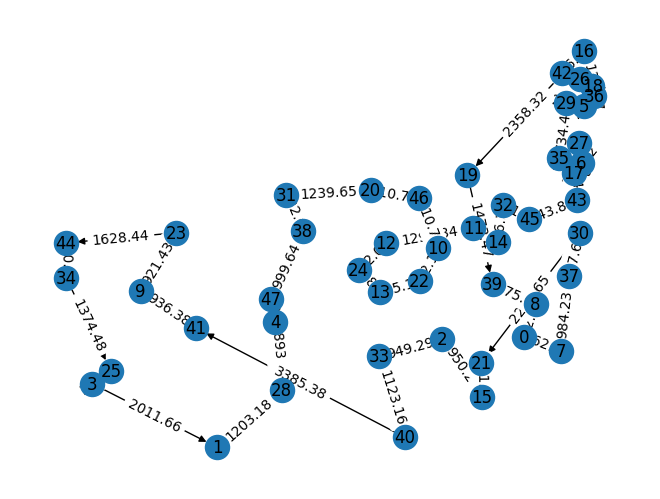

In [33]:
"""

Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """

        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.places = []
        self.route = []

    def extractData(self, inputFile=""):
        """
        Itterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """
        lines = inputFile.splitlines()
        num_nodes = int(lines[0])
        data = []
        node_index = 0 

        for line in lines[1:num_nodes + 1]:  # Iterate over the lines except for the first line
            coords = line.split()  # Split the line into seperate coordinates

            if len(coords) == 2:  # If the line has 2 coordinates
                x_coord = int(coords[0])
                y_coord = int(coords[1])
                data.append([node_index, x_coord, y_coord])  # Add everything to the list of lists
                node_index += 1  

        self.nodeData = data  # Store the processed data in nodeData
        print(data)  # Print the result for debugging
        return


    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        coords = {}

        for i in range(len(self.nodeData)):  # Iterate through the nodeData adding data for each into dictionary
            coords[i] = (self.nodeData[i][1], self.nodeData[i][2])  # Make index the key and with x and y coords as a tuple
            
            # print(coords[i]) # print results for debugging
        self.coords = coords  # Store results in coords
        return


    def calculateDistance(self, a, b):
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """
        #Uses the formula for distance to calculate the shortest path between the two nodes
        delta_x = int(b[0]) - int(a[0])
        delta_y = int(b[1]) - int(a[1])
        distance_squared = delta_x**2 + delta_y**2
        distance = round(math.sqrt(distance_squared), 2)
        return distance

    def getRoute(self, current, visits=[], nVisits=[], needList=True):
        """Makes a list of the nodes to be visited, in order, according to the greedy alogorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})
        """
        if needList:
            # Initialize the list of nodes not yet visited
            nVisits = [i for i in range(len(self.nodeData)) if i != current]
        
        visits.append(current)  # Add the current node to visited
        
        # Loop until all nodes are visited
        while nVisits:
            nearest_node = None
            nearest_distance = math.inf

            # Find the nearest unvisited node
            for neighbor in nVisits:
                distance = self.calculateDistance(self.coords[current], self.coords[neighbor])
                if distance < nearest_distance:
                    nearest_node = neighbor
                    nearest_distance = distance

            # Move to the nearest node
            visits.append(nearest_node)
            nVisits.remove(nearest_node)
            current = nearest_node  # Update the current node
        
        # Return the completed route
        self.route = visits  # Store the route
        return visits


    def beGreedy(self, start):
        """ puts together the greedy algorithm. Gets the route order and adds the starting place to the end of the route
        Arguments:
            start -- the starting node for the greedy algorithm
        """
        visited = set()  # Track visited nodes
        tour = []  # Track the tour order
        tour_cost = 0  # Track the cost of the tour
        current_node = start  # Start from the given node

        # Add the start node to the tour and mark it visited
        tour.append(current_node)
        visited.add(current_node)

        # Loop until all nodes are visited
        while len(visited) < len(self.nodeData):
            nearest_node = None
            nearest_distance = math.inf

            # Find the nearest unvisited node
            for neighbor in range(len(self.nodeData)):
                if neighbor not in visited:
                    distance = self.calculateDistance(self.coords[current_node], self.coords[neighbor])
                    if distance < nearest_distance:
                        nearest_node = neighbor
                        nearest_distance = distance

            # Add the nearest node to the tour, mark it visited, and update the current node
            tour.append(nearest_node)
            visited.add(nearest_node)
            tour_cost += nearest_distance
            current_node = nearest_node

        # Return to the starting node
        tour_cost += self.calculateDistance(self.coords[current_node], self.coords[start])
        tour.append(start)

        # Store the resulting route
        self.route = tour
        print(f"Best route: {tour}, Cost: {tour_cost}")  # Print resutl for testing

        return tour_cost


    def listPlaces(self):
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """
        places = []
        for i in range(len(self.coords)):
            places.append[i]
        
        print(places)
        self.places = places
        return

    def cleanUpList(self, visited, notVisited):
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """

        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self):
        """ adds nodes to the networkx graph
        """

        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self):
        """Adds graphs to the networkx graph
        """

        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()




def main():
    tsp = TSP()

    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)
    tsp.addEdges()
    tsp.showGraph()


main()